<h1>Group 1 Transactions Final Project


<h2>Import Dependencies


In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import matplotlib.pyplot as plt

<h2>Import and check data

In [147]:
excel_data = pd.read_excel("datasets/ISE_CoffeeTransaction_April2023.xlsx", sheet_name = None)

dataframes = {}

for sheet_name, sheet_data in excel_data.items():
    dataframes[sheet_name] = sheet_data
    
transactions = dataframes["Transactions"]
account = dataframes["Account"]
location = dataframes["location"]
products = dataframes["Product"]

In [148]:
transactions.head()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location
0,23,1004,2.50,2023-01-01,19:00:00,NaN,0.00,1,7
1,41666,1013,65.77,2023-01-01,11:00:00,A,65.77,7,7
2,6321,1014,37.80,2023-01-01,12:00:00,B,37.80,10,7
3,34042,1015,3.00,2023-01-01,15:00:00,NaN,0.00,2,7
4,1006,1016,3.00,2023-01-01,16:00:00,NaN,0.00,2,7


<h2>Exploratory Data Analysis (EDA)

<h3>Visualising Location of Interest

In [149]:
location

,Location,Location Detail,Latitude,Longtitude
0,1,CentralWorld,13.746680,100.539067
1,2,Siam Paragon,13.746464,100.534566
2,3,Mega Bangna,13.660615,100.609743
3,4,Silom Complex,13.725744,100.531582
4,5,The Crystal,13.787408,100.571691
5,6,CentralPlaza WestGate,13.816253,100.348801
6,7,Sukhumvit,13.730524,100.567579


In [150]:
transactions.groupby("Location").count()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id
Location,,,,,,,,
7,44500,44500,44500,44500,44500,22155,44500,44500


<p><b>Note: </b>The transactional data given was for only one location, which was <strong>Sukhumvit</strong>

In [151]:
map_bangkok = folium.Map(location=[13.736717, 100.523186], zoom_start=12)

coordinates = []
location_dic = location.to_dict()
for i in range(7):
    coords = {}
    coords["name"] = location_dic["Location Detail"][i].strip()
    coords["lat"] = location_dic["Latitude"][i]
    coords["lon"] = location_dic["Longtitude"][i]

    coordinates.append(coords)

for coord in coordinates:
    name = coord['name']
    lat = coord['lat']
    lon = coord['lon']
    popup_text = f'<b>{name}</b>'
    if name == "Sukhumvit":
        folium.Marker([lat, lon], icon=folium.Icon(color='red'), popup=popup_text).add_to(map_bangkok)    
    else:
        folium.Marker([lat, lon], popup=popup_text).add_to(map_bangkok)

title = '''
        <h1 align="center" style="font-size:16px"><b>Locations</b></h3>
        '''
map_bangkok.get_root().html.add_child(folium.Element(title))
map_bangkok


<h3>Visualising Total Sales

In [152]:
transactions.head()

,transaction_id,Account_id,transaction_amount,transaction_date,time_to_purchase,gas_type,gas_price_purchase,product_id,Location
0,23,1004,2.50,2023-01-01,19:00:00,NaN,0.00,1,7
1,41666,1013,65.77,2023-01-01,11:00:00,A,65.77,7,7
2,6321,1014,37.80,2023-01-01,12:00:00,B,37.80,10,7
3,34042,1015,3.00,2023-01-01,15:00:00,NaN,0.00,2,7
4,1006,1016,3.00,2023-01-01,16:00:00,NaN,0.00,2,7


In [153]:
total_transactions =  products.merge(transactions[["product_id","transaction_amount"]].groupby("product_id").sum(), left_on = "product_id", right_on = "product_id")
total_transactions

,product_id,product_name,product_description,product_category,product_price,transaction_amount
0,1,Coffee,Hot brewed coffee,Beverage,2.5,46173.00
1,2,Croissant,Flaky and buttery pastry,Pastry,3.0,48031.99
2,3,Tea,Tea with milk and sugar,Beverage,2.0,43355.05
3,4,Muffin,Freshly baked muffin,Pastry,3.5,45829.57
4,5,Bagel,Toasted bagel with cream cheese,Pastry,3.0,44832.61
5,6,Latte,Coffee with steamed milk,Beverage,3.5,44601.93
6,7,Cappuccino,Coffee with foamed milk,Beverage,3.5,47562.13
7,8,Espresso,Strong coffee shot,Beverage,2.5,42912.10
8,9,Hot Chocolate,Warm chocolate drink,Beverage,3.0,5508.00
9,10,RedBull,RedBull,Beverage,4.0,808630.78


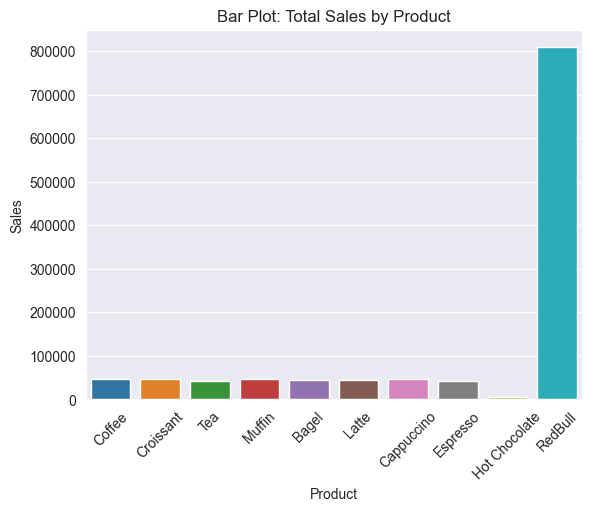

In [154]:
sns.set_style('darkgrid')

sns.barplot(x = "product_name", y = "transaction_amount", data = total_transactions)
plt.xlabel('Product')
plt.ylabel('Sales')
plt.title('Bar Plot: Total Sales by Product')
plt.xticks(rotation=45)

plt.show()

<h3>Visualising Target Age 

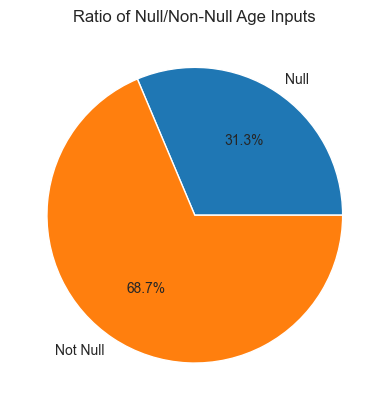

In [155]:
plt.pie([account["Age"].isnull().sum(),account["Age"].notnull().sum()], labels = ["Null", "Not Null"], autopct='%1.1f%%')
plt.title("Ratio of Null/Non-Null Age Inputs")
plt.show()

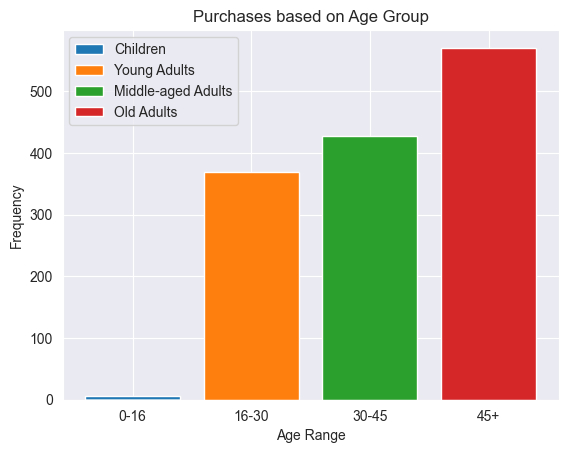

In [156]:
import pandas as pd
import matplotlib.pyplot as plt

temp = account.copy()

# Assuming 'df' is your DataFrame containing the 'age' column

# Define the age ranges and labels
age_ranges = [0, 16, 30, 45, 100]
age_labels = ['Children', 'Young Adults', 'Middle-aged Adults', 'Old Adults']
age_group = ["0-16", "16-30", "30-45", "45+"]
# Categorize the ages into age ranges
temp['AgeRange'] = pd.cut(temp['Age'], bins=age_ranges, labels=age_group, right=False)

# Calculate the frequency of each age range
age_range_counts = temp['AgeRange'].value_counts().sort_values(ascending = True)

# Create a bar plot
colors = plt.cm.tab10(range(len(age_labels)))
plt.bar(age_range_counts.index, age_range_counts.values, color = colors)
plt.xlabel('Age Range')
plt.ylabel('Frequency')
plt.title('Purchases based on Age Group')

legend_handles = [plt.bar(0, 0, color=colors[i])[0] for i in range(len(age_labels))]
plt.legend(legend_handles, age_labels, loc='upper left')

plt.show()
